In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
The aim of this project is to build a deep learning algorithm that will help
analyse, detect, classify, and predict malaria image cells
between infected and uninfected. This will help in screening
of malaria sickness through the use of a microscope to diagnose the blood into infected or uninfected.

In [ ]:
We will be following this Supervised Deep Learning model pipeline:

1. Data exploration (reading the data, simple visualisations, dataset preparation,)
2. Pre-processing (data transformation, NO feature extraction/engineering)
3. Construct the network architecture (building the model)
4. train the model (fit function)
5. validation and model predictions
6. Classification Performance metrics

In [ ]:
Then we need to look at the performance indicators since the model’s goal is to 
classify to a given category (i.e.. class label).

1. accuracy
2. confusion matrix (TP, FP, TN, FN)
3. classification report (precision, recall, F1-score)




In [3]:
import numpy as np 
import pandas as pd 
import os  
import cv2 
import matplotlib.pyplot as plt 
from PIL import Image 
import tensorflow as tf 
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
#from tensorflow.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import Sequential,backend,optimizers

In [7]:
directories = [d for d in os.listdir("/kaggle/input/malaria-dataset/cell_images/cell_images") if os.path.isdir(os.path.join("/kaggle/input/malaria-dataset/cell_images/cell_images", d))]
directories

['Uninfected', 'Parasitized']

In [9]:
Parasitized = os.listdir("/kaggle/input/malaria-dataset/cell_images/cell_images/Parasitized")
print(Parasitized[:10])

Uninfected = os.listdir("/kaggle/input/malaria-dataset/cell_images/cell_images/Uninfected/")
print('\n')
print(Uninfected[:10])

['C99P60ThinF_IMG_20150918_141001_cell_93.png', 'C99P60ThinF_IMG_20150918_141001_cell_133.png', 'C101P62ThinF_IMG_20150918_151942_cell_60.png', 'C162P123ThinF_IMG_20151116_102655_cell_163.png', 'C52P13thinF_IMG_20150725_124830_cell_174.png', 'C136P97ThinF_IMG_20151005_141803_cell_121.png', 'C48P9thinF_IMG_20150721_161243_cell_157.png', 'C137P98ThinF_IMG_20151005_163901_cell_80.png', 'C51AP12thinF_IMG_20150724_155046_cell_94.png', 'C51AP12thinF_IMG_20150724_161126_cell_118.png']


['C203ThinF_IMG_20151029_102123_cell_51.png', 'C238NThinF_IMG_20151207_114038_cell_84.png', 'C119P80ThinF_IMG_20151002_124304_cell_112.png', 'C39P4thinF_original_IMG_20150622_111723_cell_33.png', 'C101P62ThinF_IMG_20150918_151149_cell_63.png', 'C180P141NThinF_IMG_20151201_165601_cell_115.png', 'C95P56ThinF_IMG_20150821_171603_cell_75.png', 'C236ThinF_IMG_20151127_102516_cell_177.png', 'C125P86ThinF_IMG_20151004_102053_cell_83.png', 'C49P10thinF_IMG_20150724_102330_cell_160.png']


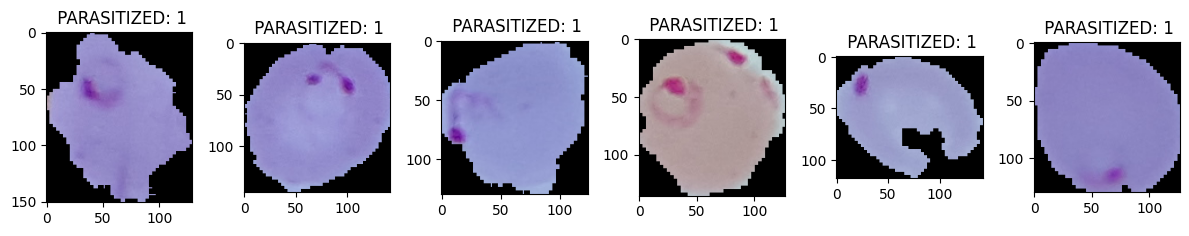

In [13]:
plt.figure(figsize = (12,12))
for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread('/kaggle/input/malaria-dataset/cell_images/cell_images/Parasitized' + "/" + Parasitized[i])
    plt.imshow(img)
    plt.title(' PARASITIZED: 1')
    plt.tight_layout()
plt.show()

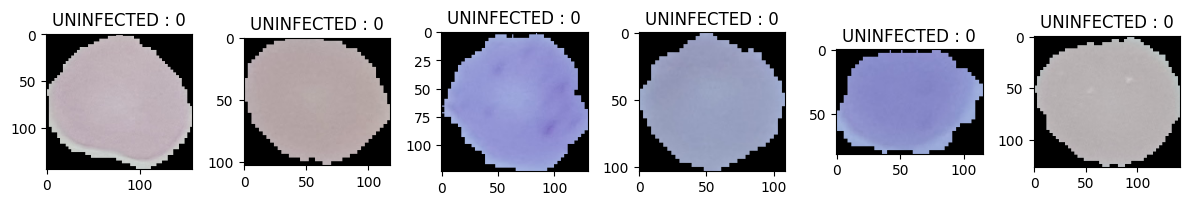

In [12]:
plt.figure(figsize = (12,12))
for i in range(6):
    plt.subplot(1, 6, i+1)
    img = cv2.imread('/kaggle/input/malaria-dataset/cell_images/cell_images/Uninfected' + "/" + Uninfected[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [14]:
# we will Loop through the label subdirectories and collect the data in two lists, 
# one list for labels, and one list for the images inside those label folders.
labels = []
images = []

category = 0 # this is the first folder on the cell_images folder
for d in directories:
    label_dir = os.path.join("/kaggle/input/malaria-dataset/cell_images/cell_images/", d)
    # to get all the image files (all .png) in each subdirectory
    file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".png")]
    
    for f in file_names:
        img = cv2.imread(f)
        imresize = cv2.resize(img, (50, 50))
        images.append(imresize)
        labels.append(category)
            
    category += 1 # to automatically select the next in folder category to be (1) following the initial one in the subdirectory for cell_images
# The images and labels variables are being converted to N

In [15]:
# The images and labels variables are being converted to Numpy format

images = np.array(images) # The number of dimensions is the rank of the array
images.shape

(27558, 50, 50, 3)

In [16]:
# for label 

labels = np.array(labels)
labels.shape

(27558,)

In [17]:
# we will split the data into train and test by importing the train_test function from sklearn.

from sklearn.model_selection import train_test_split
# we will use test size of 20% and random state of 1234
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1234) 

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22046, 50, 50, 3)
(22046,)
(5512, 50, 50, 3)
(5512,)


In [19]:
# to preserve PC RAM, we created a function that converts the data to 32 bit data:
# this will normalize inputs from [0.0, 255.0] to end up with input in the range [0.0, 1.0]

X_train = np.array(X_train).astype('float32') # float 32 shows the conversion state of  32 bits in computer memory
X_test = np.array(X_test).astype('float32')
X_train /= 255.0    # normalizing the input
X_test /= 255.0

# then we will use one-hot encoding on the labels.
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
print(y_train.shape) #  one-hot encoding conversion confirmation

(22046, 2)


In [21]:
num_classes = y_train.shape[1]
print(num_classes)

2


In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(50, 50, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # num_classes = 2 #Softmax classification is normally used in the output layer and also in this project’s output layer.

# we will now Compile model
epochs = 25 # this is advised to be either 25 or above 
lr = 0.01 # learning rate
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # to compile the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8667648   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)


print(len(history.history['loss']))

Epoch 1/25
345/345 [==============================] - 79s 227ms/step - loss: 0.5849 - accuracy: 0.7363 - val_loss: 0.3029 - val_accuracy: 0.9185
Epoch 2/25
345/345 [==============================] - 79s 229ms/step - loss: 0.2537 - accuracy: 0.9135 - val_loss: 0.1954 - val_accuracy: 0.9360
Epoch 3/25
345/345 [==============================] - 78s 225ms/step - loss: 0.1935 - accuracy: 0.9337 - val_loss: 0.1828 - val_accuracy: 0.9383
Epoch 4/25
345/345 [==============================] - 78s 226ms/step - loss: 0.1627 - accuracy: 0.9453 - val_loss: 0.1826 - val_accuracy: 0.9432
Epoch 5/25
345/345 [==============================] - 78s 226ms/step - loss: 0.1428 - accuracy: 0.9511 - val_loss: 0.1521 - val_accuracy: 0.9514
Epoch 6/25
345/345 [==============================] - 81s 236ms/step - loss: 0.1211 - accuracy: 0.9598 - val_loss: 0.1564 - val_accuracy: 0.9499
Epoch 7/25
345/345 [==============================] - 79s 229ms/step - loss: 0.1033 - accuracy: 0.9640 - val_loss: 0.1803 - val_ac

In [ ]:
Validation and Visualization

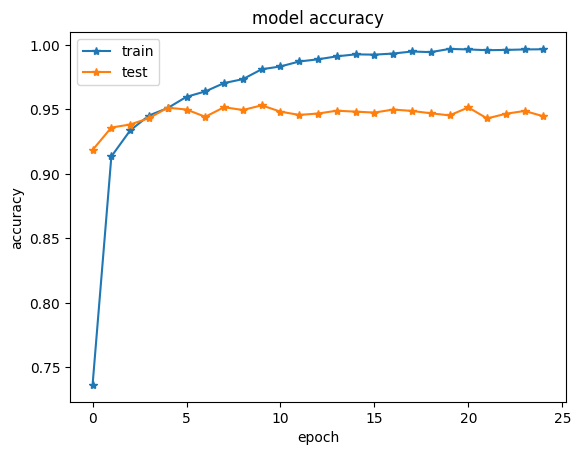

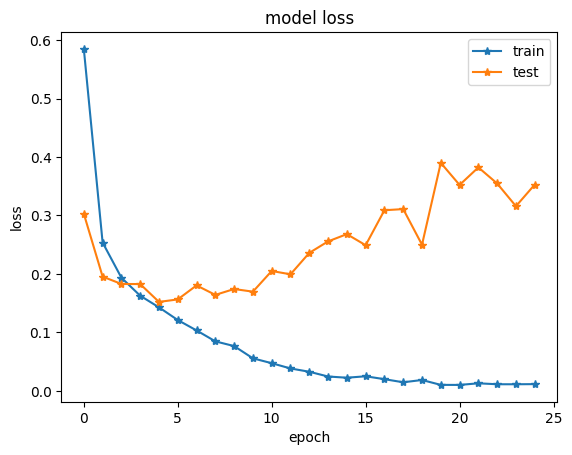

In [31]:

#   Plot data to see relationships in training and test data and the relationship for its model loss 

# summarize history for accuracy
plt.plot(history.history['accuracy'], marker = '*')
plt.plot(history.history['val_accuracy'], marker = '*')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'], marker = '*')
plt.plot(history.history['val_loss'], marker = '*')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Evaluating The model**

In [32]:
predict = model.evaluate(X_test, y_test)
print("Loss: ",predict[0])
print("Accuracy: ",predict[1]*100)

173/173 [==============================] - 5s 26ms/step - loss: 0.3528 - accuracy: 0.9447
Loss:  0.3527980446815491
Accuracy:  94.46662068367004


In [33]:
from sklearn.metrics import classification_report # for visualization of the classification metrics

preds = model.predict(X_test)
print(preds.shape) 
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)
print(classification_report(y_true, preds, target_names=directories))

(5512, 2)
(5512,)
(5512, 2)
              precision    recall  f1-score   support

  Uninfected       0.92      0.97      0.95      2730
 Parasitized       0.97      0.92      0.94      2782

    accuracy                           0.94      5512
   macro avg       0.95      0.94      0.94      5512
weighted avg       0.95      0.94      0.94      5512



<Axes: >

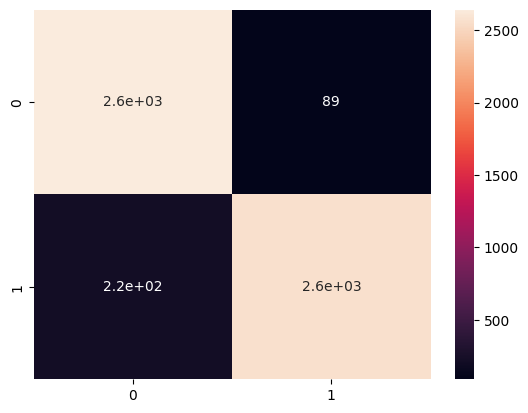

In [34]:
from sklearn.metrics import confusion_matrix # for confusion metrics
import seaborn as sns

'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tn


# To Plot the Confusion Matrix:
import matplotlib.pyplot as plt
conf = confusion_matrix(y_true, preds)
sns.heatmap(conf, annot=True)

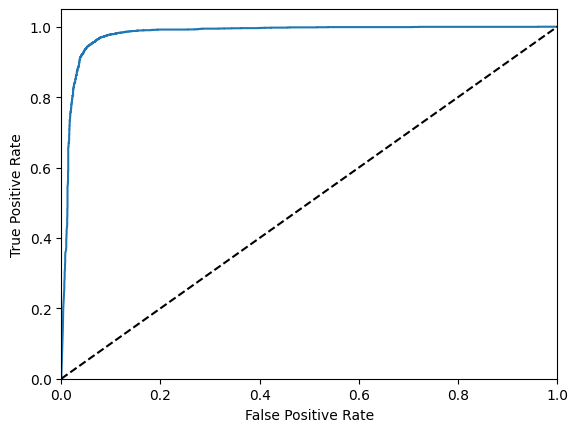

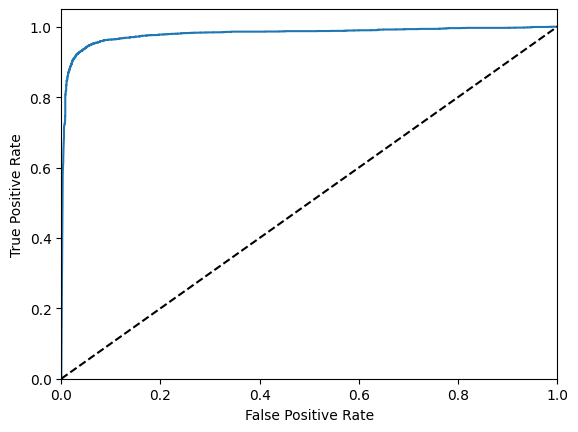

In [35]:
from sklearn.metrics import roc_curve, auc

y_score = model.predict(X_test) # for the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

**Conclusion**


This project presents a deep learning model for malaria detection using CNN, a deep learning algorithm. We got an average validation accuracy of 95% with average validation loss of 0.3303.We can get an accuracy of around 95% using the built model, with nearly equal and low False Negatives and False Positives.
Overall, I would say CNN is a very powerful model for image classification and does not require many pre-processing tasks to be done as it is included in the convolutional and pooling layers.

 